# Mixing functions

In [1]:
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

PyPlot

In this notebook, we give examples of how one can generate mixing and excess properties in `Clapeyron.jl`.

## Mixing volume of water + ethanol

First generating the model:

In [2]:
model1 = PR(["water","ethanol"])
model2 = PSRK(["water","ethanol"])
model3 = SAFTgammaMie(["water","ethanol"])
models = [model1,model2,model3];    

Mixing properties can be obtained for any of the bulk properties supported by `Clapeyron.jl` using the `mixing(model, p, T, z, property)` function as shown below:

In [3]:
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
V_E = []
for i ∈ 1:3
    append!(V_E,[mixing.(models[i],4e5,298.15,X,volume)])
end

Plotting:

In [4]:
plt.plot(1 .-x,V_E[1].*1e6,label="PR",linestyle=":")
plt.plot(1 .-x,V_E[2].*1e6,label="PSRK",linestyle="--")
plt.plot(1 .-x,V_E[3].*1e6,label="SAFT-γ Mie",linestyle="-.")
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Excess Volume / (cm³/mol)",fontsize=16)
plt.ylim([-1.2,0.7])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper left",frameon=false,fontsize=11) 

PyObject <matplotlib.legend.Legend object at 0x16357f150>

It is interesting to see how, despite characterising the binary VLE properties very well, PSRK struggles to model the bulk properties of the mixture.

## Enthalpy of mixing water + acetone

The mixing function of enthalpy, entropy and Gibbs free energy can all be obtained for activity models; any other mixing property cannot be as easily obtained. As an example, we consider the water + acetone mixture:

In [5]:
model1 = NRTL(["water","acetone"])
model2 = VTPR(["water","acetone"])
model3 = PCSAFT(["water","acetone"])
model4 = SAFTgammaMie(["water","acetone"])
models = [model1,model2,model3,model4];

Obtaining the enthalpy of mixing:

In [6]:
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
H_E = []
for i ∈ 1:4
    append!(H_E,[mixing.(models[i],1.013e6,278.15,X,enthalpy)])
end

Plotting:

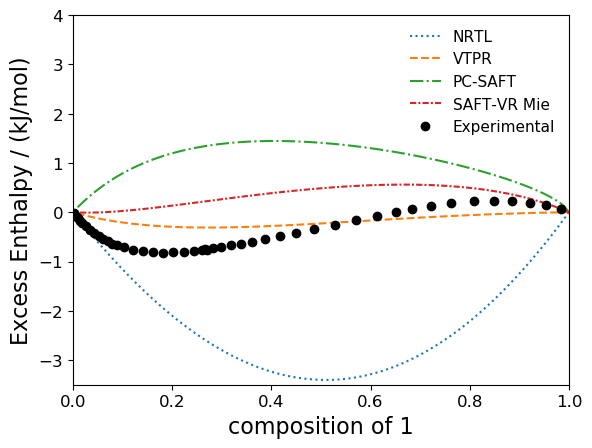

In [544]:
plt.plot(1 .-x,H_E[1]./1e3,label="NRTL",linestyle=":")
plt.plot(1 .-x,H_E[2]./1e3,label="VTPR",linestyle="--")
plt.plot(1 .-x,H_E[3]./1e3,label="PC-SAFT",linestyle="-.")
plt.plot(1 .-x,H_E[4]./1e3,label="SAFT-VR Mie",linestyle=(0, (3, 1, 1, 1)))
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Excess Enthalpy / (kJ/mol)",fontsize=16)
plt.ylim([-3.5,4])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="bottom left",frameon=false,fontsize=11) 
plt.savefig("excess_enthalpy_AcT_water.pdf",bbox_inches="tight")

Here again we see how, despite obtaining very accurate predictions for the binary VLE of water + acetone, NRTL struggles when characterising the mixing properties of this sytem.